Download link: https://docs.activeloop.ai/datasets/lfpw-dataset

In [1]:
import hub
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [2]:
dt = hub.load("hub://activeloop/LFPW-train")
ds = hub.load("hub://activeloop/LFPW-test")
dataloader_train = dt.tensorflow()
dataloader_test = ds.tensorflow()

hub://activeloop/LFPW-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/LFPW-train
hub://activeloop/LFPW-test loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/LFPW-test


# Check image&keypoints

tf.Tensor([178], shape=(1,), dtype=int32)
tf.Tensor([184], shape=(1,), dtype=int32)
tf.Tensor([193], shape=(1,), dtype=int32)
tf.Tensor([200], shape=(1,), dtype=int32)
tf.Tensor([192], shape=(1,), dtype=int32)
tf.Tensor([183], shape=(1,), dtype=int32)
tf.Tensor([235], shape=(1,), dtype=int32)
tf.Tensor([243], shape=(1,), dtype=int32)
tf.Tensor([251], shape=(1,), dtype=int32)
tf.Tensor([259], shape=(1,), dtype=int32)
tf.Tensor([252], shape=(1,), dtype=int32)
tf.Tensor([244], shape=(1,), dtype=int32)


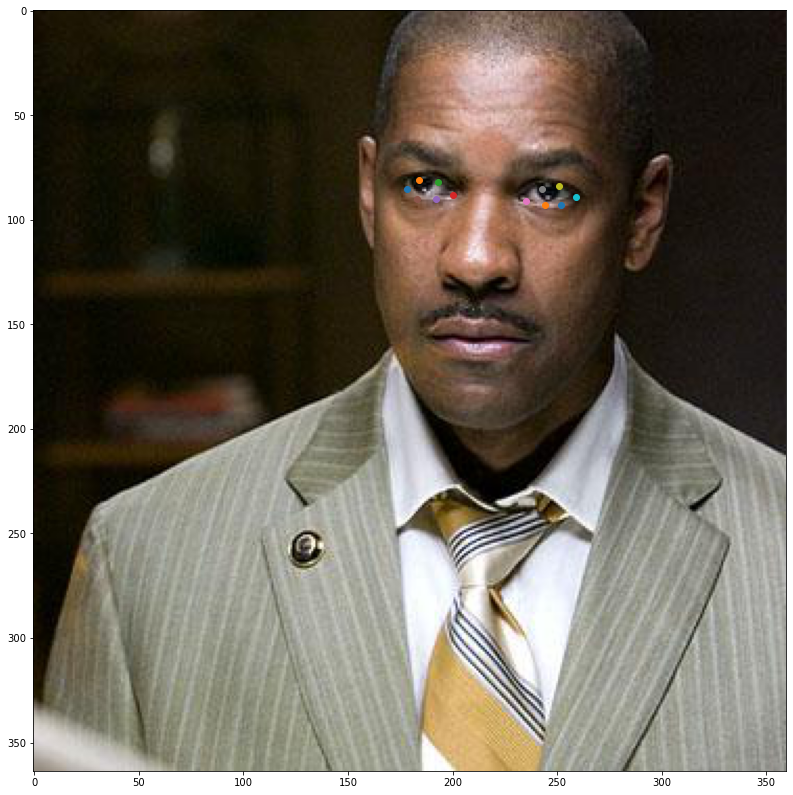

In [3]:
fig, ax = plt.subplots(figsize=(14, 14))
for i in dataloader_train:
    ax.imshow(i["images"])
    index=0
    for j in range(0, len(i["keypoints"]), 3):
        index+=1
        if index > 36 and index < 49:
            print(i["keypoints"][j])
            ax.scatter(i["keypoints"][j],i["keypoints"][j+1])
    break

공식사이트(https://neerajkumar.org/databases/lfpw/)의 설명보다 keypoint가 두배 가량 많다(35 -> 68)  
배포과정에서(https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/) 에 나온 방법에 따라 새로 annotaion된듯 하다.

# Download by ndarray

In [7]:
train_images = []
train_annotation = []
test_images = []
test_annotation = []

for i in dataloader_train:
    train_image = np.array(i["images"])
    if i["images"].shape[2] !=3:
        continue
    train_images.append(train_image)
    train_annotation.append(np.array(i["keypoints"]))
print("Train convert done")
for i in dataloader_test:
    test_image = np.array(i["images"])
    test_images.append(test_image)
    test_annotation.append(np.array(i["keypoints"]))
print("Test convert done")

Train convert done
Test convert done


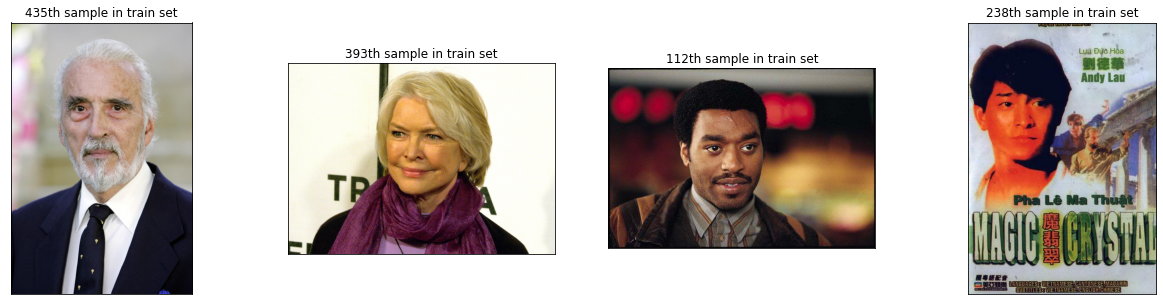

In [128]:
fig, ax = plt.subplots(1, 4, figsize=(22, 5))
for i in range(4):
    index = np.random.randint(500)
    ax[i].imshow(train_images[index])
    ax[i].set_title("{}th sample in train set".format(index))
    ax[i].xaxis.set_ticks([])
    ax[i].yaxis.set_ticks([])    

In [10]:
np.save("D:LFPW/train_image.npy", train_images)
np.save("D:LFPW/train_annotation.npy", train_annotation)
np.save("D:LFPW/test_image.npy", test_images)
np.save("D:LFPW/test_annotation.npy", test_annotation)

C:\Users\hjhhi\anaconda3\envs\python3.9.0\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [152]:
load = np.load("D:LFPW/train_image.npy",allow_pickle=True)

# Test by visualize loaded images

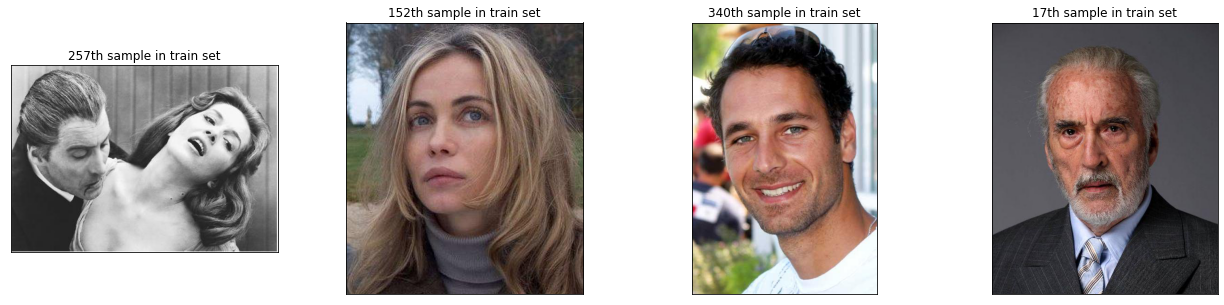

In [153]:
fig, ax = plt.subplots(1, 4, figsize=(22, 5))
for i in range(4):
    index = np.random.randint(500)
    ax[i].imshow(load[index])
    ax[i].set_title("{}th sample in train set".format(index))
    ax[i].xaxis.set_ticks([])
    ax[i].yaxis.set_ticks([])    